In [1]:
import pandas as pd
import numpy as np

In [3]:
df = pd.read_csv("spam.csv",encoding="latin1")


In [4]:
df.sample(5)

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
3994,ham,R u in this continent?,NaN,NaN,NaN
1779,spam,"Loan for any purpose å£500 - å£75,000. Homeown...",NaN,NaN,NaN
3082,ham,K..k:)how about your training process?,NaN,NaN,NaN
357,spam,Ur cash-balance is currently 500 pounds - to m...,NaN,NaN,NaN
441,ham,You were supposed to wake ME up &gt;:(,NaN,NaN,NaN


In [5]:
df.shape

(5572, 5)

## 1.Data Cleaning

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [7]:
#drop last 3 columns
df.drop(columns=['Unnamed: 2','Unnamed: 3','Unnamed: 4' ],inplace=True)

In [8]:
df.sample(5)

,v1,v2
2797,ham,Purity of friendship between two is not about ...
198,ham,Hi its Kate how is your evening? I hope i can ...
27,ham,Did you catch the bus ? Are you frying an egg ...
2194,ham,Hi my email address has changed now it is
3927,ham,Babe ? I lost you ... Will you try rebooting ?


In [9]:
#renaming the columns
df.rename(columns={'v1':'target','v2':'text'},inplace=True)
df.sample(5)

,target,text
292,ham,Oops. 4 got that bit.
4733,spam,Buy Space Invaders 4 a chance 2 win orig Arcad...
1763,ham,Joy's father is John. Then John is the NAME of...
788,spam,"5 Free Top Polyphonic Tones call 087018728737,..."
4189,ham,"Sorry, I'll call later"


In [10]:
from sklearn.preprocessing import LabelEncoder
encoder =  LabelEncoder()

In [11]:
df['target'] = encoder.fit_transform(df['target'])

In [12]:
df.head()

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [13]:
#missing value
df.isnull().sum()

target    0
text      0
dtype: int64

In [14]:
#check for duplicate value
df.duplicated().sum()

403

In [15]:
#remove duplicates
df = df.drop_duplicates(keep='first')

In [16]:
df.duplicated().sum()

0

In [17]:
df.shape

(5169, 2)

## 2.EDA

In [18]:
df.head()

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [19]:
df['target'].value_counts()

0    4516
1     653
Name: target, dtype: int64

([<matplotlib.patches.Wedge at 0x2063bec14b0>,
 [Text(-1.0144997251399075, 0.4251944351600247, 'ham'),
  Text(1.014499764949479, -0.4251943401757036, 'spam')],
 [Text(-0.5533634864399495, 0.23192423736001344, '87.37'),
  Text(0.5533635081542612, -0.23192418555038377, '12.63')])

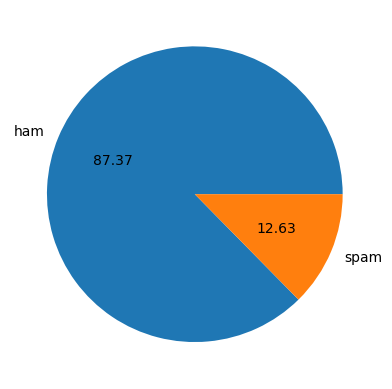

In [20]:
import matplotlib.pyplot as plt
plt.pie(df['target'].value_counts(),labels=['ham','spam'],autopct="%0.2f")

In [21]:
!pip install nltk

Defaulting to user installation because normal site-packages is not writeable


In [22]:
import nltk

In [23]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\coolt\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [24]:
df['num_charecter']=df['text'].apply(len)

In [25]:
df.head()

,target,text,num_charecter
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61


In [26]:
#num of words
df['num_words'] = df['text'].apply(lambda x:len(nltk.word_tokenize(x)))

In [27]:
df.head(5)

,target,text,num_charecter,num_words
0,0,"Go until jurong point, crazy.. Available only ...",111,24
1,0,Ok lar... Joking wif u oni...,29,8
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37
3,0,U dun say so early hor... U c already then say...,49,13
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15


In [28]:
df['num_sentances'] = df['text'].apply(lambda x:len(nltk.sent_tokenize(x)))

In [29]:
df.head(5)

,target,text,num_charecter,num_words,num_sentances
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [30]:
df[['num_charecter','num_words','num_sentances']].describe()

,num_charecter,num_words,num_sentances
count,5169.000000,5169.000000,5169.000000
mean,78.977945,18.453279,1.947185
std,58.236293,13.324793,1.362406
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,60.000000,15.000000,1.000000
75%,117.000000,26.000000,2.000000
max,910.000000,220.000000,28.000000


In [31]:
df[df['target'] == 0][['num_charecter','num_words','num_sentances']].describe()

,num_charecter,num_words,num_sentances
count,4516.000000,4516.000000,4516.000000
mean,70.459256,17.120903,1.799601
std,56.358207,13.493725,1.278465
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,220.000000,28.000000


In [32]:
#spam
df[df['target'] == 1][['num_charecter','num_words','num_sentances']].describe()

,num_charecter,num_words,num_sentances
count,653.000000,653.000000,653.000000
mean,137.891271,27.667688,2.967841
std,30.137753,7.008418,1.483201
min,13.000000,2.000000,1.000000
25%,132.000000,25.000000,2.000000
50%,149.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,224.000000,46.000000,8.000000


In [33]:
import seaborn as sns

<Axes: xlabel='num_charecter', ylabel='Count'>

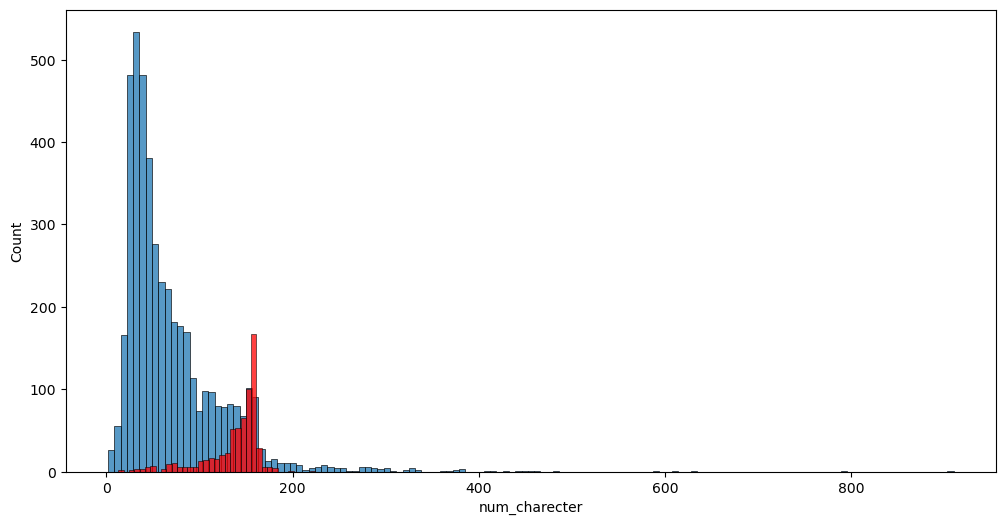

In [34]:
plt.figure(figsize=(12,6))
sns.histplot(df[df['target'] == 0]['num_charecter'])
sns.histplot(df[df['target'] == 1]['num_charecter'],color='red')

<Axes: xlabel='num_words', ylabel='Count'>

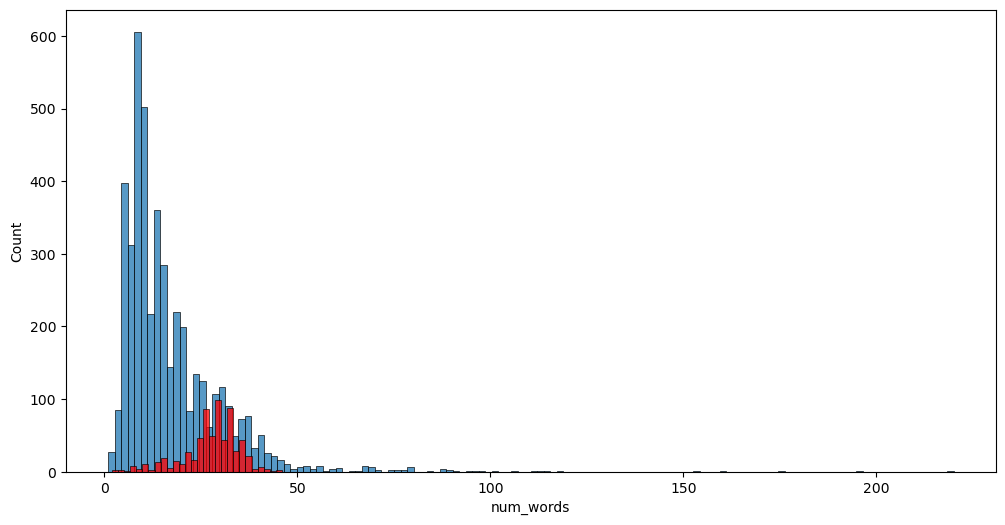

In [35]:
plt.figure(figsize=(12,6))
sns.histplot(df[df['target'] == 0]['num_words'])
sns.histplot(df[df['target'] == 1]['num_words'],color='red')

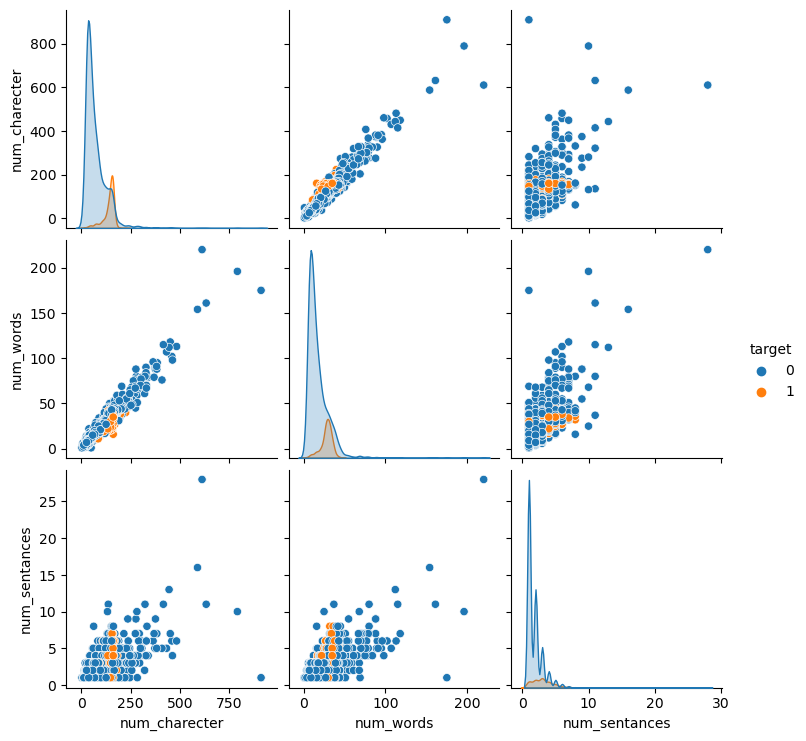

In [36]:
sns.pairplot(df,hue='target')

<Axes: >

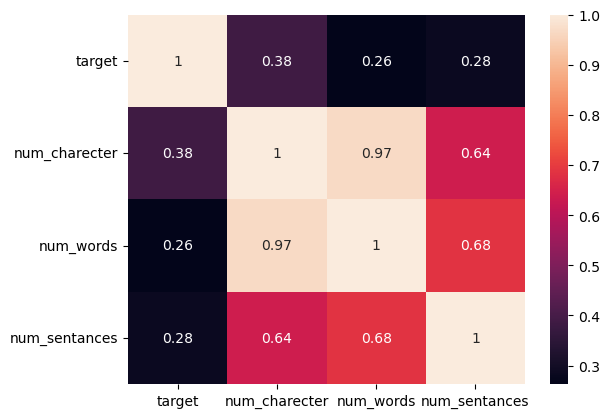

In [37]:
sns.heatmap(df.corr(numeric_only=True),annot=True)


## 3.Data Preprocessing
### •lower case
### •Tokenization
### •Removing special
### •Removing stop words and punctuation
### •stemming


In [38]:
from nltk.corpus import stopwords


In [39]:
from nltk.stem import PorterStemmer
ps = PorterStemmer()

In [40]:
import string
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [41]:
def transform_text(text):
    text = text.lower()
    text=nltk.word_tokenize(text)
    
    y=[]
    for i in text:
        if i.isalnum():
            y.append(i)
    text=y[:]
    y.clear()
    
    for i in text:
        if i not in stopwords.words('english')and i not in string.punctuation:
            y.append(i)
    text=y[:]
    y.clear()
    
    for i in text:
        y.append(ps.stem(i))
        
        
    return " ".join(y)

In [42]:
transform_text('i loved the yt lecture on machine learning how about you? ')

'love yt lectur machin learn'

In [43]:
df['text'][0]

'Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...'

In [44]:
from nltk.stem import PorterStemmer

ps = PorterStemmer()
stemmed_word = ps.stem('dancing')
print(stemmed_word)


danc


In [45]:
df['transformed_text']=df['text'].apply(transform_text)

In [46]:
df.head()

,target,text,num_charecter,num_words,num_sentances,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [47]:
from wordcloud import WordCloud
wc = WordCloud(width=500, height=500, min_font_size=10, background_color='white')


In [48]:
spam_wc = wc.generate(df[df['target']== 1]['transformed_text'].str.cat(sep=" "))

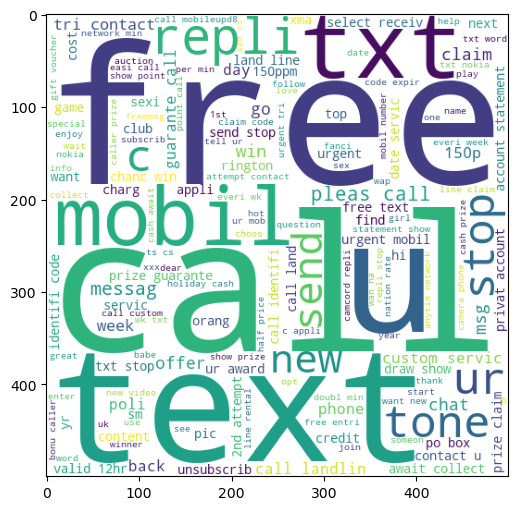

In [49]:
plt.figure(figsize=(12,6))
plt.imshow(spam_wc)

In [50]:
ham_wc = wc.generate(df[df['target'] == 0]['transformed_text'].str.cat(sep=""))

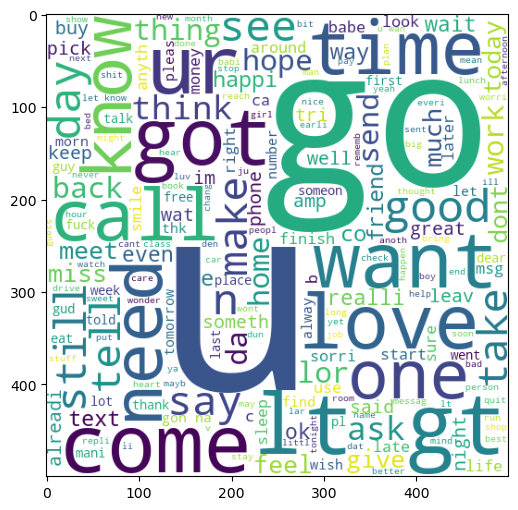

In [51]:
plt.figure(figsize=(12,6))
plt.imshow(spam_wc)

In [52]:
df.head()

,target,text,num_charecter,num_words,num_sentances,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [53]:
spam_corpus=[]
for msg in df[df['target']== 1]['transformed_text'].tolist():
    for word in msg.split():
        spam_corpus.append(word)
    
 

In [116]:
len(spam_corpus)

9883

In [54]:
from collections import Counter

#plt.xticks(rotation='vertical')

In [55]:
com_word=pd.DataFrame(Counter(spam_corpus).most_common(30))[0]
count_word=pd.DataFrame(Counter(spam_corpus).most_common(30))[1]
merged_df = pd.concat([com_word, count_word], axis=1)
merged_df.head()


,0,1
0,call,320
1,free,191
2,2,155
3,txt,141
4,text,122


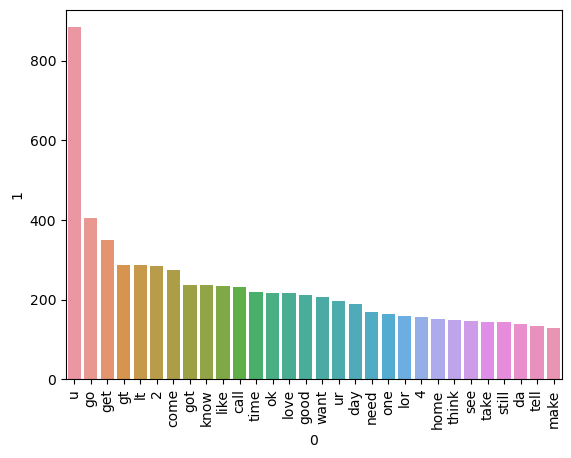

In [85]:
sns.barplot(x=merged_df[0],y=merged_df[1],data=merged_df)
plt.xticks(rotation='vertical')
plt.show()

In [57]:
ham_corpus = []
for msg in df[df['target']== 0]['transformed_text'].tolist():
    for word in msg.split():
        ham_corpus.append(word)

In [58]:
len(ham_corpus)

35394

In [59]:
com_word=pd.DataFrame(Counter(ham_corpus).most_common(30))[0]
count_word=pd.DataFrame(Counter(ham_corpus).most_common(30))[1]
merged_df = pd.concat([com_word, count_word], axis=1)
merged_df.head()


,0,1
0,u,883
1,go,404
2,get,349
3,gt,288
4,lt,287


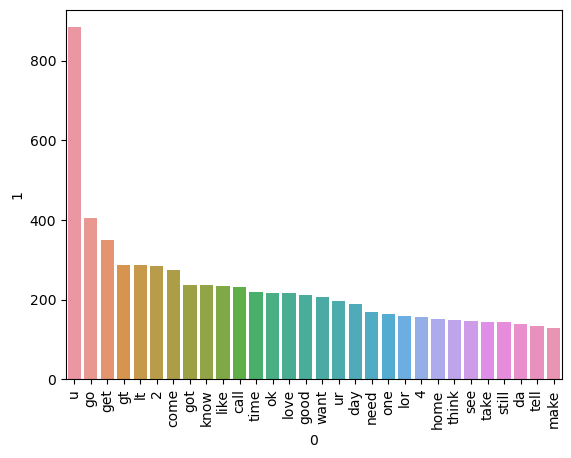

In [86]:
sns.barplot(x=merged_df[0],y=merged_df[1],data=merged_df)
plt.xticks(rotation='vertical')
plt.show()

In [61]:
#text vectorization
#using bag of words
df.head()

,target,text,num_charecter,num_words,num_sentances,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [62]:
##Model Building

In [63]:
from sklearn.feature_extraction.text import CountVectorizer
cv=CountVectorizer()

In [64]:
df.head()

,target,text,num_charecter,num_words,num_sentances,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [65]:
X=cv.fit_transform(df['transformed_text']).toarray()

In [66]:
X.shape

(5169, 6708)

In [67]:
y=df['target'].values

In [68]:
y

array([0, 0, 1, ..., 0, 0, 0])

In [69]:
from sklearn.model_selection import train_test_split

In [70]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)

In [71]:
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score

In [72]:
gnb=GaussianNB()
mnb=MultinomialNB()
bnb=BernoulliNB()

In [73]:
gnb.fit(X_train,y_train)
y_pred1=gnb.predict(X_test)
print(accuracy_score(y_test,y_pred1))
print(confusion_matrix,(y_test,y_pred1))
print(precision_score(y_test,y_pred1))


0.8800773694390716
<function confusion_matrix at 0x000002063649B910> (array([0, 0, 0, ..., 0, 0, 0]), array([0, 1, 1, ..., 0, 0, 0]))
0.5315315315315315


In [74]:
mnb.fit(X_train,y_train)
y_pred2=mnb.predict(X_test)
print(accuracy_score(y_test,y_pred2))
print(confusion_matrix,(y_test,y_pred2))
print(precision_score(y_test,y_pred2))


0.9642166344294004
<function confusion_matrix at 0x000002063649B910> (array([0, 0, 0, ..., 0, 0, 0]), array([0, 0, 0, ..., 0, 0, 0]))
0.8344370860927153


In [75]:
bnb.fit(X_train,y_train)
y_pred3=bnb.predict(X_test)
print(accuracy_score(y_test,y_pred3))
print(confusion_matrix,(y_test,y_pred3))
print(precision_score(y_test,y_pred3))


0.9700193423597679
<function confusion_matrix at 0x000002063649B910> (array([0, 0, 0, ..., 0, 0, 0]), array([0, 0, 0, ..., 0, 0, 0]))
0.9734513274336283


In [76]:
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
cv = CountVectorizer
tfidf =TfidfVectorizer()

In [77]:
M =tfidf.fit_transform(df['transformed_text']).toarray()

In [78]:
M.shape

(5169, 6708)

In [79]:
M_train,M_test,y_train,y_test = train_test_split(M,y,test_size=0.2,random_state=2)

In [80]:
gnb.fit(M_train,y_train)
y_pred4=gnb.predict(M_test)
print(accuracy_score(y_test,y_pred4))
print(confusion_matrix,(y_test,y_pred4))
print(precision_score(y_test,y_pred4))


0.8762088974854932
<function confusion_matrix at 0x000002063649B910> (array([0, 0, 0, ..., 0, 0, 0]), array([0, 1, 1, ..., 0, 0, 0]))
0.5231481481481481


In [81]:
mnb.fit(M_train,y_train)
y_pred5=mnb.predict(M_test)
print(accuracy_score(y_test,y_pred5))
print(confusion_matrix,(y_test,y_pred5))
print(precision_score(y_test,y_pred5))


0.9593810444874274
<function confusion_matrix at 0x000002063649B910> (array([0, 0, 0, ..., 0, 0, 0]), array([0, 0, 0, ..., 0, 0, 0]))
1.0


In [82]:
bnb.fit(M_train,y_train)
y_pred6=bnb.predict(M_test)
print(accuracy_score(y_test,y_pred6))
print(confusion_matrix,(y_test,y_pred6))
print(precision_score(y_test,y_pred6))


0.9700193423597679
<function confusion_matrix at 0x000002063649B910> (array([0, 0, 0, ..., 0, 0, 0]), array([0, 0, 0, ..., 0, 0, 0]))
0.9734513274336283


In [83]:
#TFIDF-->MNB

In [84]:
import pickle
pickle.dump(tfidf,open('vectorizer.pkl','wb'))
pickle.dump(mnb,open('spam_model.pkl','wb'))